5495
M411
557 & 506 & 455
pessimistic 0.183
optimistic 0.101
5495
M438
983 & 818 & 731
pessimistic 0.256
optimistic 0.106
M411
area is 6.11, ndensity is 173.2
3821.651678735165 4069.5162007783315
M438
area is 6.11, ndensity is 314.3
3998.3714383710803 4225.927681663755


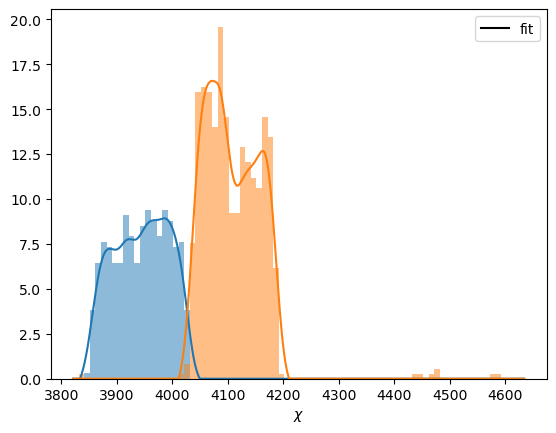

Configuration successfully written to /pscratch/sd/h/hebina/AbacusLBG/ibis_tertiary44/LAE_auto_v2/mc/AbacusSummit_high_c000_ph100/z2.5/ibis_tertiary44_clustering_v4.2/logM_cut_11.00_logM1_11.70_sigma_0.33_kappa_1.00_alpha_0.66/configs.json
5495
M464
628 & 585 & 549
pessimistic 0.126
optimistic 0.062
5495
M490
517 & 469 & 434
pessimistic 0.161
optimistic 0.075
5495
M517
284 & 274 & 253
pessimistic 0.109
optimistic 0.077
M464
area is 6.11, ndensity is 198.9
4160.466381022305 4370.258611487922
M490
area is 6.11, ndensity is 144.8
4309.783833032 4510.0707547405245
M517
area is 6.11, ndensity is 74.9
4447.873138830191 4633.915701144099


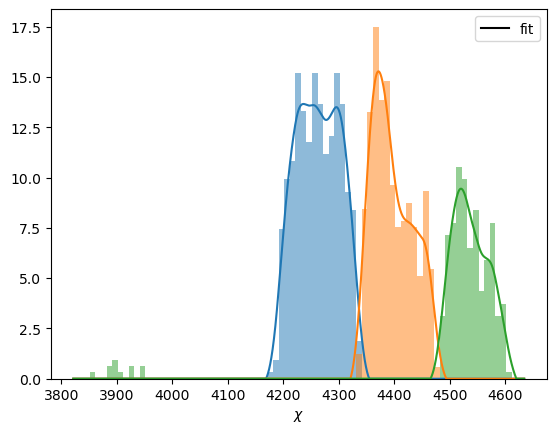

Configuration successfully written to /pscratch/sd/h/hebina/AbacusLBG/ibis_tertiary44/LAE_auto_v2/mc/AbacusSummit_high_c000_ph100/z3.0/ibis_tertiary44_clustering_v4.2/logM_cut_11.00_logM1_11.70_sigma_0.33_kappa_1.00_alpha_0.66/configs.json


<Figure size 640x480 with 0 Axes>

In [5]:

basedir = "/pscratch/sd/h/hebina/AbacusLBG/"
import sys, os
from astropy.table import Table, vstack
from astropy.io import fits

for subdir in ["",'ibis_tertiary44/LAE_auto_v2']:
    sys.path.append(basedir+subdir)
from misc import *
from matplotlib import pyplot as plt
sys.path.append('..')
from mc_forecast import mc_forecast
from forecast_utils import *
import time

cosmo = get_cosmo_P18()
h = cosmo.h()

fn = "/pscratch/sd/h/hebina/IBIS/selection_clustering/catalogs/clustering_cat_v4.fits"
# fn = "/global/cfs/cdirs/desi/users/raichoor/laelbg/ibis/analysis/daily-tmp/ibis-xmm-ar-djs-he-rr.fits"
d = Table.read(fn)
radius = 1.4
ra0,dec0 = 35.75, -4.75
area = 1.4**2 * np.pi
coord_cut = angular_distance(d['RA'],d['DEC'],ra0,dec0)<radius
d = d[coord_cut]

fn = "/pscratch/sd/h/hebina/IBIS/selection_clustering/catalogs/redshift_cat_v4.fits"
# fn = "/pscratch/sd/h/hebina/AbacusLBG/ibis_tertiary44/LAE_auto/ibis-xmm-ar-djs-he-rr.fits"
d_spec = Table.read(fn)
radius = 1.4
ra0,dec0 = 35.75, -4.75
area = 1.4**2 * np.pi
coord_cut = angular_distance(d_spec['RA'],d_spec['DEC'],ra0,dec0)<radius
d_spec = d_spec[coord_cut]

use_mask = True
m_bands = ['M411','M438','M464','M490','M517']
band_z = {
    'M411':[2.26,2.56],
    'M438':[2.47,2.77],
    'M464':[2.68,2.98],
    'M490':[2.89,3.2],
    'M517':[3.1,3.41]
}

# lgMc_list = [11.00,11.25,11.50,11.75,12.0,12.25,12.5]
# alph_list = [.33,.5,.66]#,1.]
# sigm_list = [.33,.5,.66]#,1.]
# kapp_list = [1]
# plat_list = [5,10]

# lgMc_list = [11.75]
lgMc_list = [11.00]
alph_list = [.66]
# sigm_list = [.66]
sigm_list = [.33]
kapp_list = [1]
plat_list = [5]

nbox = 256

# enumerate through HOD parameters and generate HODs

for lgMcut in lgMc_list:
  for plateau in plat_list:
    lgM1 = lgMcut + np.log10(plateau)
    for alph in alph_list:
      for sigm in sigm_list:
        for kappa in kapp_list:
          # hod_params = {'logM_cut':11.75,'logM1':12.45,'sigma':0.66,'kappa':1.00,'alpha':1.0}
          hod_params = {'logM_cut':lgMcut,'logM1':lgM1,'sigma':sigm,'kappa':kappa,'alpha':alph}           
            
          # first two bins
          forecast1 = mc_forecast.initialize('ibis_tertiary44_clustering_v4.2',cosmo,d,d_spec , '../../ibis_tertiary44_msk.fits',35.75,-4.75, 2.8*np.pi/180,
                                 band_z['M411'][0], band_z['M517'][1], hod_params, use_mask, overwrite=True,ntarg_ratio=1.,
                                 fsamp=d_spec['RA'].size/d['RA'].size,basedir='..',nbox=nbox,m_bands=['M411','M438'],zbox=2.5)

          # next three bins
          forecast2 = mc_forecast.initialize('ibis_tertiary44_clustering_v4.2',cosmo,d,d_spec , '../../ibis_tertiary44_msk.fits',35.75,-4.75, 2.8*np.pi/180,
                                 band_z['M411'][0], band_z['M517'][1], hod_params, use_mask, overwrite=True,ntarg_ratio=1.,
                                 fsamp=d_spec['RA'].size/d['RA'].size,basedir='..',nbox=nbox,m_bands=['M464','M490','M517'],zbox=3.0)


### Check z1

In [6]:
area = 6.11
count = 0
for i in range(nbox):
    targ = forecast1.get_hod_targ(i)
    count += targ['RA'].size
count /= nbox
print(f'area is {area:.2f}deg2')
print(f'average target catalog size is {count:.2f}')
print(f'average target density is {count/area:.2f}/deg2')

area is 6.11deg2
average target catalog size is 2973.14
average target density is 486.60/deg2


In [13]:
area = 6.11
count = 0
for i in range(nbox):
    targ = forecast1.get_hod_spec(i)
    count += targ['RA'].size
count /= nbox
print(f'area is {area:.2f}deg2')
print(f'average target catalog size is {count:.2f}')
print(f'average target density is {count/area:.2f}/deg2')

area is 6.11deg2
average target catalog size is 2477.30
average target density is 405.45/deg2


In [14]:
((1-np.array(forecast1.config['interloper_band']))*np.array(forecast1.config['ndensity_band'])).sum(),np.array(forecast1.config['ndensity_band']).sum()

(405.91215327560997, 487.49776383946676)

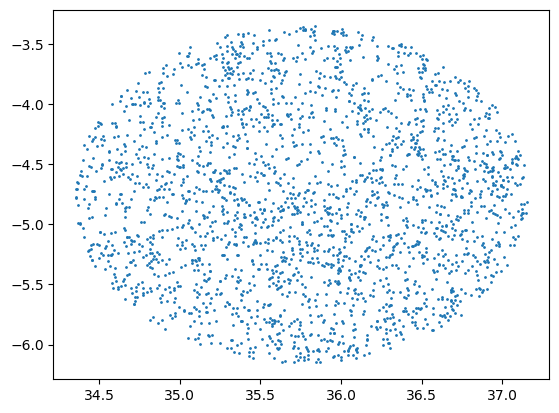

In [16]:
plt.scatter(targ['RA'],targ['DEC'],s=1)
plt.show()

### Check z2

In [9]:
area = 6.11
count = 0
for i in range(nbox):
    targ = forecast2.get_hod_targ(i)
    count += targ['RA'].size
count /= nbox
print(f'area is {area:.2f}deg2')
print(f'average target catalog size is {count:.2f}')
print(f'average target density is {count/area:.2f}/deg2')

area is 6.11deg2
average target catalog size is 2560.83
average target density is 419.12/deg2


In [18]:
area = 6.11
count = 0
for i in range(nbox):
    targ = forecast2.get_hod_spec(i)
    count += targ['RA'].size
count /= nbox
print(f'area is {area:.2f}deg2')
print(f'average target catalog size is {count:.2f}')
print(f'average target density is {count/area:.2f}/deg2')

area is 6.11deg2
average target catalog size is 2301.88
average target density is 376.74/deg2


In [19]:
((1-np.array(forecast2.config['interloper_band']))*np.array(forecast2.config['ndensity_band'])).sum(),np.array(forecast2.config['ndensity_band']).sum()

(376.0097940551794, 418.62643545811926)

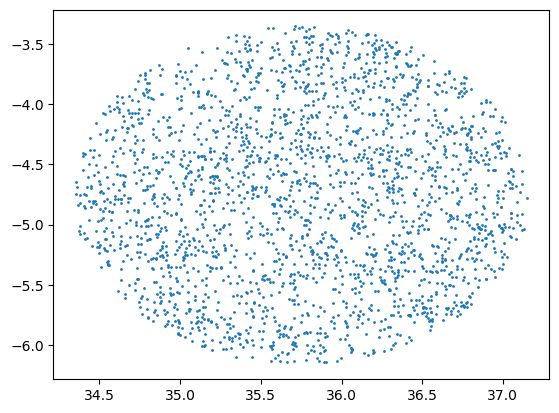

In [20]:
plt.scatter(targ['RA'],targ['DEC'],s=1)
plt.show()